# Read data

In this section we reads the pickle files of Graph, training positive sample, training negative sample and test.csv files 
* Training pickle files are dictionaries with keys as (u,v) and values are list of path_length, Jaccard_coeff_pred and Jaccard_coeff_successor.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import random
import csv
# %pip install networkx
from tqdm import tqdm
# %pip install tqdm
import networkx as nx
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# caluculate the roc curve and auc score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Read the train.txt file using with open
with open('../data/train.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    data = {}
    for row in reader:
        data[int(row[0])] = [int(x) for x in row[1:]]

In [4]:
g = nx.DiGraph(data)

In [5]:
in_degrees = g.in_degree()
out_degrees = g.out_degree()

In [6]:
# print properties of graph g
print("Number of nodes:", g.number_of_nodes())
print("Number of edges:", g.number_of_edges())
print("Density:", nx.density(g))


Number of nodes: 4867136
Number of edges: 23945602
Density: 1.010831775855996e-06


In [ ]:
# # save train_pos and train_ve
# print("train_pos loading...")
# with open('../data/train_pos.pickle', 'rb') as handle:
#     train_pos = pickle.load(handle)
# print("train_pos loaded")
# print("train_ve loading...")
# with open('../data/train_ve.pickle', 'rb') as handle:
#     train_ve = pickle.load(handle)
# print("train_ve loaded")

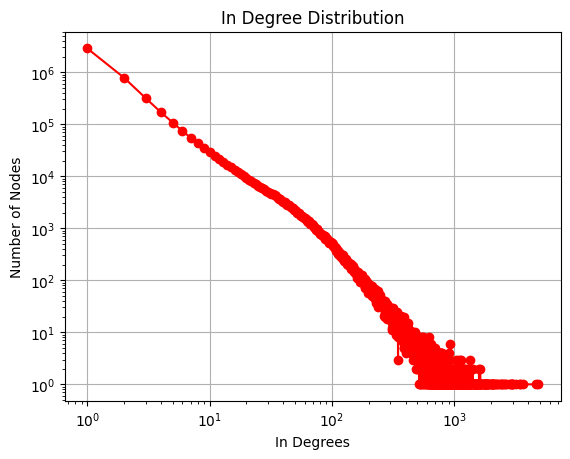

In [7]:
# from graph plot the distribution of in_degrees
in_degrees = dict(g.in_degree())
in_values = sorted(set(in_degrees.values()))
in_hist = [list(in_degrees.values()).count(x) for x in in_values]
plt.figure()
plt.grid(True)
plt.loglog(in_values, in_hist, 'ro-')
plt.xlabel('In Degrees')
plt.ylabel('Number of Nodes')
plt.title('In Degree Distribution')
plt.show()


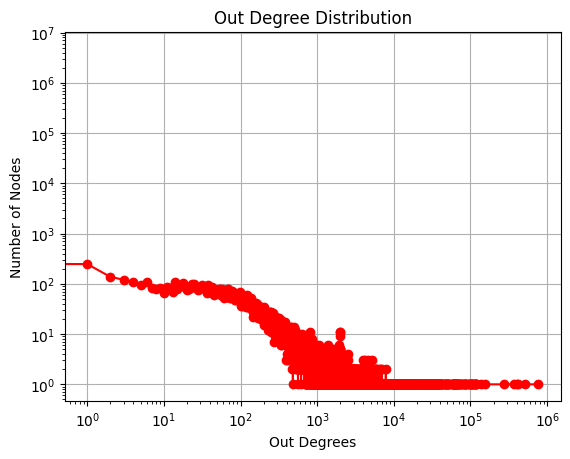

In [8]:
out_degrees = dict(g.out_degree())
out_values = sorted(set(out_degrees.values()))
out_hist = [list(out_degrees.values()).count(x) for x in out_values]
plt.figure()
plt.grid(True)
plt.loglog(out_values, out_hist, 'ro-')
plt.xlabel('Out Degrees')
plt.ylabel('Number of Nodes')
plt.title('Out Degree Distribution')
plt.show()

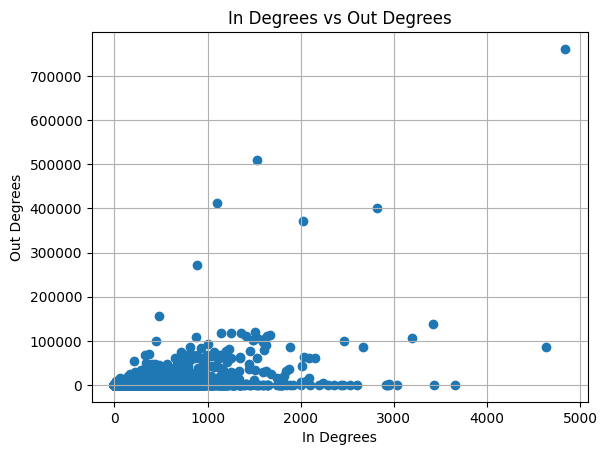

In [9]:
# indegree vs outdegree distribution of each node
plt.figure()
plt.grid(True)
plt.scatter(list(in_degrees.values()), list(out_degrees.values()))
plt.xlabel('In Degrees')
plt.ylabel('Out Degrees')
plt.title('In Degrees vs Out Degrees')
plt.show()


In [10]:
# make list of data keys
data_keys = list(data.keys())

In [11]:
len(data_keys)

20000

In [12]:
list_no_followees = []
for i in data.keys():
    if len(data[i]) == 0:
        list_no_followees.append(i)
print(len(list_no_followees))

430


In [13]:
data_keys = list(set(list(data.keys())).difference(set(list_no_followees)))
train_ve = {}
total_nodes = list(g.nodes())
train_pos = {}

In [575]:
len

19615

In [14]:
# Dictionary between node and out_degree of n1_nodes
n1_out_degrees = {}
for i in tqdm(data_keys):
    n1_out_degrees[i] = out_degrees[i]

bins_n1_nodes = {'0-10':[],'10-100':[],'100-1000':[],'1000-10000':[],'10000-100000':[],'100000-1000000':[]}
# create bins for n1_out_degrees.values()
for j,i in tqdm(n1_out_degrees.items()):
    if i >= 0 and i < 10:
        bins_n1_nodes['0-10'].append(j)
    elif i >= 10 and i < 100:
        bins_n1_nodes['10-100'].append(j)
    elif i >= 100 and i < 1000:
        bins_n1_nodes['100-1000'].append(j)
    elif i >= 1000 and i < 10000:
        bins_n1_nodes['1000-10000'].append(j)
    elif i >= 10000 and i < 100000:
        bins_n1_nodes['10000-100000'].append(j)
    elif i >= 100000 and i < 1000000:
        bins_n1_nodes['100000-1000000'].append(j)
print(bins_n1_nodes)

100%|██████████| 19570/19570 [00:00<00:00, 1223304.81it/s]

{'0-10': [3932202, 1966283, 4128990, 1442017, 2031877, 2031882, 1638721, 262467, 3801429, 1507676, 1966515, 500, 4129311, 3408426, 4522612, 3015287, 4129435, 4326067, 393925, 4260667, 656276, 3670943, 1311667, 1639501, 4064381, 2753736, 1836279, 263446, 2884962, 460162, 3409286, 4720014, 3081633, 2033087, 4195785, 3868135, 1443360, 2819633, 4720198, 722525, 198359, 3278613, 1247012, 4065091, 1902, 3540903, 853954, 1181915, 985334, 1050902, 1247731, 3214161, 2821022, 3148705, 1117090, 134107, 1707086, 1838439, 1510810, 1969669, 724572, 2756232, 528070, 659187, 4591408, 2232142, 2166625, 1838972, 790647, 3346743, 4526569, 3478014, 1708597, 4788848, 1970818, 2232978, 4461288, 1577721, 4964, 3544020, 136177, 2823341, 2102449, 3544248, 2561261, 71431, 1906450, 1578771, 2627378, 3675991, 1513327, 4855715, 1578953, 661461, 2431061, 4724949, 3348717, 2890024, 4201023, 2497138, 3087015, 72431, 1579800, 6941, 2235211, 4463552, 3742829, 4594818, 1383637, 1842434, 3087634, 1383730, 4005320, 597494

In [606]:
import math
math.ceil(0.3)

1

In [15]:
train_pos = {}

In [16]:
edges = list(g.edges())
no_of_pvedges = 60000
c = 0
c += math.ceil(no_of_pvedges * len(bins_n1_nodes['0-10']) / len(data_keys))
while len(train_pos) < c:
    n1 = random.choice(bins_n1_nodes['0-10'])
    n2 = random.choice(data[n1])
    train_pos[(n1, n2)] = [1]
# 
while len(train_pos) <  c:
    n1 = random.choice(bins_n1_nodes['10-100'])
    n2 = random.choice(data[n1])
    # path = nx.shortest_path_length(g, n1, n2)
    train_pos[(n1, n2)] = [1]
    # c +=1
print(len(train_pos))

c += math.ceil(no_of_pvedges * len(bins_n1_nodes['10-100']) / len(data_keys))
while len(train_pos) < c:
    n1 = random.choice(bins_n1_nodes['100-1000'])
    n2 = random.choice(data[n1])
    try:
        train_pos[(n1, n2)] = [1]
        # c += 1
    except:
        pass
print(len(train_pos))

c += math.ceil(no_of_pvedges * len(bins_n1_nodes['100-1000']) / len(data_keys))
while len(train_pos) < c:
    n1 = random.choice(bins_n1_nodes['1000-10000'])
    n2 = random.choice(data[n1])
    try:
       train_pos[(n1, n2)] = [1]
       # c +=1
    except:
        pass
print(len(train_pos))

c += math.ceil(no_of_pvedges * len(bins_n1_nodes['1000-10000']) / len(data_keys))
while len(train_pos) < c:
    n1 = random.choice(bins_n1_nodes['10000-100000'])
    n2 = random.choice(data[n1])
    try:
       train_pos[(n1, n2)] = [1]
       # c += 1
    except:
        pass
print(len(train_pos))

c += math.ceil(no_of_pvedges * len(bins_n1_nodes['10000-100000']) / len(data_keys))
while len(train_pos) < c:
    n1 = random.choice(bins_n1_nodes['100000-1000000'])
    n2 = random.choice(data[n1])
    try:
       train_pos[(n1, n2)] = [1]
       # c +=1
    except:
        pass
print(len(train_pos))
    

NameError: name 'math' is not defined

In [ ]:
with open('../data/train_pos_stratified_sample.pickle', 'wb') as handle:
    pickle.dump(train_pos, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [592]:
total_ve_nodes = list(set(list(g.nodes())).difference(set(data_keys)))

In [593]:
# sa

4847566

In [596]:
edges = list(g.edges())
c = 5000
while len(train_ve) < 1 * c:
    n1 = random.choice(bins_n1_nodes['0-10'])
    n2 = random.choice(data_keys)
    if n1 != n2:
        # path = nx.shortest_path_length(g, n1, n2)
        try:
            path = nx.shortest_path_length(g, n1, n2)
            if path > 1 and path < 5:
                train_ve[(n1, n2)] = [0]
        except:
            pass
print(len(train_ve))
# c = 0

while len(train_ve) < 2 * c:
    n1 = random.choice(bins_n1_nodes['10-100'])
    n2 = random.choice(data_keys)
    if n1 != n2:
        # path = nx.shortest_path_length(g, n1, n2)
        try:
            path = nx.shortest_path_length(g, n1, n2)
            if path > 1 and path < 5:
                train_ve[(n1, n2)] = [0]
        except:
            pass
print(len(train_ve))

# c = 0

while len(train_ve) < 3 * c:
    n1 = random.choice(bins_n1_nodes['100-1000'])
    n2 = random.choice(data_keys)
    if n1 != n2:
        # path = nx.shortest_path_length(g, n1, n2)
        try:
            path = nx.shortest_path_length(g, n1, n2)
            if path > 1 and path < 5:
                train_ve[(n1, n2)] = [0]
        except:
            pass
print(len(train_ve))

# c = 0

while len(train_ve) < 4 * c:
    n1 = random.choice(bins_n1_nodes['1000-10000'])
    n2 = random.choice(data_keys)
    if n1 != n2:
        try:
            path = nx.shortest_path_length(g, n1, n2)
            if path > 1 and path < 5:
                train_ve[(n1, n2)] = [0]
        except:
            pass
print(len(train_ve))

# c = 0

while len(train_ve) < 5 * c:
    n1 = random.choice(bins_n1_nodes['10000-100000'])
    n2 = random.choice(data_keys)
    if n1 != n2:
        # path = nx.shortest_path_length(g, n1, n2)
        try:
            path = nx.shortest_path_length(g, n1, n2)
            if path > 1 and path < 5:
                train_ve[(n1, n2)] = [0]
        except:
            pass
print(len(train_ve))

# c = 0

while len(train_ve) < 6 * c:
    n1 = random.choice(bins_n1_nodes['100000-1000000'])
    n2 = random.choice(data_keys)
    if n1 != n2:
        # path = nx.shortest_path_length(g, n1, n2)
        try:
            path = nx.shortest_path_length(g, n1, n2)
            if path > 1 and path < 5:
                train_ve[(n1, n2)] = [0]
        except:
            pass
print(len(train_ve))


5000
10000
15000
20000
25000
30000


In [598]:
with open('../data/train_ad_ad_30k.pickle', 'wb') as handle:
    pickle.dump(train_ve, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [600]:
edges = list(g.edges())
c = 5000
while len(train_ve) < 30000 + 1 * c:
    n1 = random.choice(bins_n1_nodes['0-10'])
    n2 = random.choice(total_ve_nodes)
    if n1 != n2:
        # path = nx.shortest_path_length(g, n1, n2)
        try:
            path = nx.shortest_path_length(g, n1, n2)
            if path > 2 and path < 5:
                train_ve[(n1, n2)] = [0]
        except:
            pass
print(len(train_ve))
# c = 0

while len(train_ve) < 30000 + 2 * c:
    n1 = random.choice(bins_n1_nodes['10-100'])
    n2 = random.choice(total_ve_nodes)
    if n1 != n2:
        # path = nx.shortest_path_length(g, n1, n2)
        try:
            path = nx.shortest_path_length(g, n1, n2)
            if path > 2 and path < 5:
                train_ve[(n1, n2)] = [0]
        except:
            pass
print(len(train_ve))

# c = 0

while len(train_ve) < 30000 + 3 * c:
    n1 = random.choice(bins_n1_nodes['100-1000'])
    n2 = random.choice(total_ve_nodes)
    if n1 != n2:
        # path = nx.shortest_path_length(g, n1, n2)
        try:
            path = nx.shortest_path_length(g, n1, n2)
            if path > 1 and path < 5:
                train_ve[(n1, n2)] = [0]
        except:
            pass
print(len(train_ve))

# c = 0

while len(train_ve) < 30000 + 4 * c:
    n1 = random.choice(bins_n1_nodes['1000-10000'])
    n2 = random.choice(total_ve_nodes)
    if n1 != n2:
        try:
            path = nx.shortest_path_length(g, n1, n2)
            if path > 1 and path < 5:
                train_ve[(n1, n2)] = [0]
        except:
            pass
print(len(train_ve))

# c = 0

while len(train_ve) <30000 +  5 * c:
    n1 = random.choice(bins_n1_nodes['10000-100000'])
    n2 = random.choice(total_ve_nodes)
    if n1 != n2:
        # path = nx.shortest_path_length(g, n1, n2)
        try:
            path = nx.shortest_path_length(g, n1, n2)
            if path > 1 and path < 5:
                train_ve[(n1, n2)] = [0] 
        except:
            pass
print(len(train_ve))

# c = 0

while len(train_ve) <30000 + 6 * c:
    n1 = random.choice(bins_n1_nodes['100000-1000000'])
    n2 = random.choice(total_ve_nodes)
    if n1 != n2:
        # path = nx.shortest_path_length(g, n1, n2)
        try:
           path = nx.shortest_path_length(g, n1, n2)
           if path > 1 and path < 5:
               train_ve[(n1, n2)] = [0]
        except:
            pass
print(len(train_ve))


35000
40000
45000
50000
55000
60000


In [601]:
with open('../data/train_ve_ad_ad_60k.pickle', 'wb') as handle:
    pickle.dump(train_ve, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [602]:
len(train_ve.keys())

60000

In [589]:
for k,v in bins_n1_nodes.items():
    print(k,len(v))
# make histogram using seaborn for k vs len(v)


0-10 1494
10-100 6377
100-1000 9250
1000-10000 2518
10000-100000 340
100000-1000000 21


In [ ]:
# make plot of k vs len(v)
plt.figure()
plt.grid(True)
plt.bar(bins_n1_nodes.keys(), bins_n1_nodes.values())
plt.xlabel('In Degrees')
plt.ylabel('Number of Nodes')
plt.title('In Degree Distribution')
plt.show()


In [583]:
# sample positive edges from graph g with number of indegree > 10 and outdegree > 10
train_pos = {}
n1_nodes = list(data.keys())
total_nodes = list(g.nodes())
total_egdes = list(g.edges())
while len(train_pos) < 5000:
    n1 = random.choice(data_keys)
    n2 = random.choice(data[n1])
    # edge = random.choice(total_egdes)
    # n1 = edge[0]
    # n2 = edge[1]
    if n1 != n2:
        try:
            # path = nx.shortest_path_length(g, n1, n2)
            if out_degrees[n1] < 10 :
                train_pos[(n1,n2)] = [1]
                # g.add_edge(n1,n2)
                # print(len(train_ve))
        except:
            pass
print("sampling positive edges from graph g completed 5000")

while len(train_pos) < 10000:
    n1 = random.choice(data_keys)
    n2 = random.choice(data[n1])
    # edge = random.choice(total_egdes)
    # n1 = edge[0]
    # n2 = edge[1]
    if n1 != n2:
        try:
            # path = nx.shortest_path_length(g, n1, n2)
            if out_degrees[n1] > 10 and out_degrees[n1] < 100 :
                train_pos[(n1,n2)] = [1]
                # g.add_edge(n1,n2)
                # print(len(train_ve))
        except:
            pass
print("sampling positive edges from graph g completed 5000")

while len(train_pos) < 15000:
    n1 = random.choice(data_keys)
    n2 = random.choice(data[n1])
    # edge = random.choice(total_egdes)
    # n1 = edge[0]
    # n2 = edge[1]
    if n1 != n2:
        try:
            # path = nx.shortest_path_length(g, n1, n2)
            if out_degrees[n1] > 100 and out_degrees[n1] < 1000 :
                train_pos[(n1,n2)] = [1]
                # g.add_edge(n1,n2)
                # print(len(train_ve))
        except:
            pass

print("sampling positive edges from graph g completed 5000")

while len(train_pos) < 20000:
    n1 = random.choice(data_keys)
    n2 = random.choice(data[n1])
    # edge = random.choice(total_egdes)
    # n1 = edge[0]
    # n2 = edge[1]
    if n1 != n2:
        try:
            # path = nx.shortest_path_length(g, n1, n2)
            if out_degrees[n1] > 1000 and out_degrees[n1] < 10000 :
                train_pos[(n1,n2)] = [1]
                # g.add_edge(n1,n2)
                # print(len(train_ve))
        except:
            pass

print("sampling positive edges from graph g completed 5000")

while len(train_pos) < 25000:
    n1 = random.choice(data_keys)
    n2 = random.choice(data[n1])
    # edge = random.choice(total_egdes)
    # n1 = edge[0]
    # n2 = edge[1]
    if n1 != n2:
        try:
            # path = nx.shortest_path_length(g, n1, n2)
            if out_degrees[n1] > 10000 and out_degrees[n1] < 100000 :
                train_pos[(n1,n2)] = [1]
                # g.add_edge(n1,n2)
                # print(len(train_ve))
        except:
            pass

print("sampling positive edges from graph g completed 5000")

while len(train_pos) < 30000:
    n1 = random.choice(data_keys)
    n2 = random.choice(data[n1])
    # edge = random.choice(total_egdes)
    # n1 = edge[0]
    # n2 = edge[1]
    if n1 != n2:
        try:
            # path = nx.shortest_path_length(g, n1, n2)
            if out_degrees[n1] > 100000 and out_degrees[n1] < 1000000 :
                train_pos[(n1,n2)] = [1]
                # g.add_edge(n1,n2)
                # print(len(train_ve))
        except:
            pass









KeyboardInterrupt: 

In [577]:
n1
    

3214957

In [578]:
# check if ni is in data_keys
n1 in data_keys

True

In [251]:
# Randomly sampling the negative train edges.
train_ve = {}
n1_nodes = list(data.keys())
total_nodes = list(g.nodes())
while len(train_ve) < 100000:
    n1 = random.choice(n1_nodes)
    n2 = random.choice(total_nodes)
    if n1 != n2:
        try:
            path = nx.shortest_path_length(g, n1, n2)
            if path > 1 and in_degrees[n1] < 1000 and in_degrees[n2] < 1100 and out_degrees[n1] < 10000 and out_degrees[n2] < 7000:
                train_ve[(n1,n2)] = [path]
                # g.add_edge(n1,n2)
                # print(len(train_ve))
        except:
            pass
while len(train_ve) < 100000:
    n1 = random.choice(total_nodes)
    n2 = random.choice(n1_nodes)
    if n1 != n2:
        try:
            path = nx.shortest_path_length(g, n1, n2)
            if path > 1 and in_degrees[n1] < 1000 and in_degrees[n2] < 1100 and out_degrees[n1] < 10000 and out_degrees[n2] < 7000:
                train_ve[(n1,n2)] = [path]
                # g.add_edge(n1,n2)
                # print(len(train_ve))
        except:
            pass

while len(train_ve) < 100000:
    n1 = random.choice(total_nodes)
    n2 = random.choice(total_nodes)
    if n1 != n2:
        try:
            path = nx.shortest_path_length(g, n1, n2)
            if path > 1 and in_degrees[n1] < 1000 and in_degrees[n2] < 1100 and out_degrees[n1] < 10000 and out_degrees[n2] < 7000:
                train_ve[(n1,n2)] = [path]
                # g.add_edge(n1,n2)
                # print(len(train_ve))
        except:
            pass

# sample 100000 negative edges where path does not exist
# while len(train_ve) < 100000:
#     n1 = random.choice(total_nodes)
#     n2 = random.choice(total_nodes)
#     if n1 != n2:
#         try:
#             path = nx.shortest_path_length(g, n1, n2)
#             if path > 1 and in_degrees[n1] < 1000 and in_degrees[n2] < 1100 and out_degrees[n1] < 10000 and out_degrees[n2] < 7000:
#                 train_ve[(n1,n2)] = [path]
#                 # g.add_edge(n1,n2)
#                 # print(len(train_ve))
#         except:  
#             train_ve[(n1,n2)] = [0]

In [252]:
# Randomly sampling the negative train edges.
train_pos = {}
n1_nodes = list(data.keys())
total_nodes = list(g.nodes())
total_egdes = list(g.edges())
while len(train_pos) < 500000:
    # n1 = random.choice(n1_nodes)
    # n2 = random.choice(total_nodes)
    edge = random.choice(total_egdes)
    n1 = edge[0]
    n2 = edge[1]
    if n1 != n2:
        try:
            # path = nx.shortest_path_length(g, n1, n2)
            if in_degrees[n1] < 1000 and in_degrees[n2] < 1100 and out_degrees[n1] < 10000 and out_degrees[n2] < 7000:
                train_pos[(n1,n2)] = [1]
                # g.add_edge(n1,n2)
                # print(len(train_ve))
        except:
            pass

In [116]:
# Randomly sampling the positive train edges and removing from the graph.
# train_pos = {}
# train_edges = random.sample(list(g.edges),50000)
# for i in tqdm(train_edges):
#     train_pos[i] = [1]
#     g.remove_edge(i[0],i[1])

100%|██████████| 50000/50000 [00:01<00:00, 45135.41it/s]


In [172]:
# read test.csv
df_test = pd.read_csv('../data/test.csv', header= 0)

In [267]:
features = ['label']

# jaccard successors

In [179]:
def jaccard_coeff_successors(G,node1,node2):
    successors_u = set(G.successors(node1))
    successors_v = set(G.successors(node2))
    if successors_u and successors_v:
        common_successors = successors_u.intersection(successors_v)
        distinct_successors = successors_u.union(successors_v)
        jaccard_coefficient_s = len(common_successors) / len(distinct_successors)
        return jaccard_coefficient_s
    else:
        return 0

# jaccard predecessors

In [180]:
def jaccard_coeff_predecessors(G,node1,node2):
    predecessors_u = set(G.predecessors(node1))
    predecessors_v = set(G.predecessors(node2))
    if predecessors_u and predecessors_v:
        common_predecessors = predecessors_u.intersection(predecessors_v)
        distinct_predecessors = predecessors_u.union(predecessors_v)
        directed_jaccard_coefficient = len(common_predecessors) / len(distinct_predecessors)
        return directed_jaccard_coefficient
    else:
        return 0

In [253]:
# Append jaccard_coeff_pred and jaccard_coeff_succ to features and train_pos, train_ve
# for train_pos
for i in tqdm(train_pos):
    train_pos[i].append(jaccard_coeff_predecessors(g,i[0],i[1]))
    train_pos[i].append(jaccard_coeff_successors(g,i[0],i[1]))
# for train_ve
for i in tqdm(train_ve):
    train_ve[i].append(jaccard_coeff_predecessors(g,i[0],i[1]))
    train_ve[i].append(jaccard_coeff_successors(g,i[0],i[1]))

  0%|          | 0/500000 [00:00<?, ?it/s]

100%|██████████| 500000/500000 [00:19<00:00, 26106.35it/s]


In [268]:
features.append('jaccard_coeff_pred')
features.append('jaccard_coeff_succ')
print(features)

['label', 'jaccard_coeff_pred', 'jaccard_coeff_succ']


## Page rank features

In [13]:
# calculate th pagerank of each node in the graph
pr = nx.pagerank(g, alpha=0.8)

In [254]:
# calculate the page rank of each node in the train_pos and train_ve
for i in tqdm(train_pos.keys()):
    train_pos[i].append(pr[i[0]])
    train_pos[i].append(pr[i[1]])
# for train_ve
for i in tqdm(train_ve.keys()):
    train_ve[i].append(pr[i[0]])
    train_ve[i].append(pr[i[1]])

  0%|          | 0/500000 [00:00<?, ?it/s]

100%|██████████| 500000/500000 [00:00<00:00, 507378.96it/s]


In [269]:
features.append('page_rank_u')
features.append('page_rank_v')
print(features)

['label', 'jaccard_coeff_pred', 'jaccard_coeff_succ', 'page_rank_u', 'page_rank_v']


# Indegrees and outdegrees

In [185]:
in_degrees = g.in_degree()
out_degrees = g.out_degree()

In [255]:
# Calculate the indegree and outdegree for train_pos and train_ve
for i in tqdm(train_pos.keys()):
    train_pos[i].append(in_degrees[i[1]])
    train_pos[i].append(out_degrees[i[1]])
    train_pos[i].append(in_degrees[i[0]])
    train_pos[i].append(out_degrees[i[0]])

# for train_ve
for i in tqdm(train_ve.keys()):
    train_ve[i].append(in_degrees[i[1]])
    train_ve[i].append(out_degrees[i[1]])
    train_ve[i].append(in_degrees[i[0]])
    train_ve[i].append(out_degrees[i[0]])


100%|██████████| 500000/500000 [00:01<00:00, 360636.67it/s]


In [270]:
features.append('in_degree_u')
features.append('out_degree_u')
features.append('in_degree_v')
features.append('out_degree_v')
print(features)

['label', 'jaccard_coeff_pred', 'jaccard_coeff_succ', 'page_rank_u', 'page_rank_v', 'in_degree_u', 'out_degree_u', 'in_degree_v', 'out_degree_v']


# Iss following back

In [17]:
def follows_back(a,b,g):
    if g.has_edge(b,a):
        return 1
    else:
        return 0

In [18]:
# Calculate the follows_back for train_pos and train_ve
for i in tqdm(train_pos.keys()):
    train_pos[i].append(follows_back(i[0],i[1],g))
# for train_ve
for i in tqdm(train_ve.keys()):
    train_ve[i].append(follows_back(i[0],i[1],g))

100%|██████████| 50000/50000 [00:00<00:00, 812855.91it/s]


In [24]:
features.append('follows_back')
print(features)

['label', 'jaccard_coeff_pred', 'jaccard_coeff_succ', 'page_rank_u', 'page_rank_v', 'in_degree_u', 'out_degree_u', 'in_degree_v', 'out_degree_v', 'common_pred', 'common_success', 'transitive_frnds', 'follows_back']


In [25]:
features.remove('follows_back')

## Path Length

In [25]:
# Function to calculate the second shortest path length between two nodes
def path_length(G, source, target):
    # if G.has_edge(source,target):
    #     G.remove_edge(source,target)
    #     try:
    #         length = nx.shortest_path_length(G, source, target)
    #     except:
    #         length = -1
    #     G.add_edge(source,target)
    #     return length
    # else:
        try:
            length = nx.shortest_path_length(G, source, target)
        except:
            length = 10
        return length


In [26]:
# Estimate the path length between two nodes
# for train_pos
for i in tqdm(train_pos.keys()):
    train_pos[i].append(path_length(g, i[0], i[1]))
# for train_ve
for i in tqdm(train_ve.keys()):
    train_ve[i].append(path_length(g, i[0], i[1]))

  0%|          | 0/50000 [00:00<?, ?it/s]

100%|██████████| 50000/50000 [00:38<00:00, 1296.34it/s]


In [57]:
features.append('path_length')

In [212]:
# Save the train_pos and train_ve in pickle file
with open('../data/train_pos_ge1_rm_edges.pickle', 'wb') as handle:
    pickle.dump(train_pos, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('../data/train_ve_ge1_rm_edges.pickle', 'wb') as handle:
    pickle.dump(train_ve, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('../data/features_ge1_rm_edges.pickle', 'wb') as handle:
    pickle.dump(features, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [213]:
# Load the train_pos and train_ve from pickle file
with open('../data/train_pos_ge1_rm_edges.pickle', 'rb') as handle:
    train_pos = pickle.load(handle)
with open('../data/train_ve_ge1_rm_edges.pickle', 'rb') as handle:
    train_ve = pickle.load(handle)
with open('../data/features_ge1_rm_edges.pickle', 'rb') as handle:
    features = pickle.load(handle)

# Jaccard New

In [ ]:
def jacc_new(g,train):
    for i in tqdm(train.keys()):
        succ = set(g.successors(i[0]))
        pred = set(g.predecessors(i[1]))
        if succ and pred:
            common = succ.intersection(pred)
            union = succ.union(pred)
            # take length of union - common
            train[i].append(len(common)/len(union))
        else:
            train[i].append(0)
    return 0

In [ ]:
# features.append('jacc_new')
# jacc_new(g,train_pos)
# jacc_new(g,train_ve)

# DHDI

In [ ]:
def DHDI(g,train):
    for i in tqdm(train.keys()):
        succ = set(g.successors(i[0]))
        pred = set(g.predecessors(i[1]))
        common = succ.intersection(pred)
        train[i].append(len(common)/max(len(succ),len(pred)))
    return 0

In [ ]:
# features.append('DHDI')
# DHDI(g,train_pos)
# DHDI(g,train_ve)

# Common Predecessors

In [188]:
# Write a function for appending common predeccessors and successors to train_pos and train_ve
def common_pred(g,train):
    for i in tqdm(train.keys()):
        succ_u = set(g.successors(i[0]))
        succ_v = set(g.successors(i[1]))
        common = succ_u.intersection(succ_v)
        train[i].append(len(common))
    return 0
def common_success(g,train):
    for i in tqdm(train.keys()):
        pred_u = set(g.predecessors(i[0]))
        pred_v = set(g.predecessors(i[1]))
        common = pred_u.intersection(pred_v)
        train[i].append(len(common))
    return 0

In [257]:
common_pred(g,train_pos)
common_success(g,train_pos)
common_pred(g,train_ve)
common_success(g,train_ve)

100%|██████████| 500000/500000 [00:03<00:00, 125942.43it/s]


0

In [271]:
features.append('common_pred')
features.append('common_success')
print(features)

['label', 'jaccard_coeff_pred', 'jaccard_coeff_succ', 'page_rank_u', 'page_rank_v', 'in_degree_u', 'out_degree_u', 'in_degree_v', 'out_degree_v', 'common_pred', 'common_success']


# Transitive Friends

In [191]:
# Function to append transitive friends between two nodes to train_pos and train_ve
def transitive_frnds(g,train):
    for i in tqdm(train.keys()):
        succ_u = set(g.successors(i[0]))
        pred_v = set(g.predecessors(i[1]))
        common_succ = succ_u.intersection(pred_v)
        common = common_succ.intersection(common_succ)
        train[i].append(len(common))
    return 0

In [258]:
# Append transitive friends between two nodes to train_pos and train_ve
transitive_frnds(g,train_pos)
transitive_frnds(g,train_ve)

  0%|          | 0/500000 [00:00<?, ?it/s]

100%|██████████| 500000/500000 [00:11<00:00, 44699.69it/s]


0

In [272]:
features.append('transitive_frnds')
print(features)

['label', 'jaccard_coeff_pred', 'jaccard_coeff_succ', 'page_rank_u', 'page_rank_v', 'in_degree_u', 'out_degree_u', 'in_degree_v', 'out_degree_v', 'common_pred', 'common_success', 'transitive_frnds']


# Katz

In [ ]:
# # Katz Centrality
# katz = nx.katz.katz_centrality(g, alpha=0.005, beta=1.0, max_iter=1000, tol=1e-06, nstart=None, normalized=True, weight='weight')
# with open('../data/katz.pickle', 'wb') as handle:
#     pickle.dump(katz, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# # Load the katz from pickle file
# with open('../data/katz.pickle', 'rb') as handle:
#     katz = pickle.load(handle)

In [ ]:
# # Calculate the katz centrality for train_pos and train_ve
# features.append('katz')
# for i in tqdm(train_pos.keys()):
#     train_pos[i].append(katz[i[0]])
#     train_pos[i].append(katz[i[1]])
# # for train_ve
# for i in tqdm(train_ve.keys()):
#     train_ve[i].append(katz[i[0]])
#     train_ve[i].append(katz[i[1]])

# personalized pagerank

In [ ]:
# personalized page rank
# pr = nx.pagerank(g, alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='weight', dangling=None)

In [ ]:
# edge rank
# features.append('edge_rank')
# edge_rank = nx.edge_betweenness_centrality(g, k=None, normalized=True, weight=None, seed=None)

# Adar Index

In [259]:
def adar_index(g,train):
    for i in tqdm(train.keys()):
        succ_u = set(g.successors(i[0]))
        succ_v = set(g.successors(i[1]))
        if succ_u and succ_v:
            common = succ_u.intersection(succ_v)
            adar = 0
            for j in common:
                adar += 1/np.log(len(list(g.predecessors(j))))
            train[i].append(adar)
        else:
            train[i].append(0)
    return 0

In [260]:
adar_index(g,train_pos)
adar_index(g,train_ve)

100%|██████████| 500000/500000 [00:10<00:00, 46801.76it/s]


0

In [273]:
features.append('adar_index')

# Cosine Similarity

In [261]:
# Function to find the cosine similarity between two nodes
def cosine_followees(g,train):
    for i in tqdm(train.keys()):
        succ_u = set(g.successors(i[0]))
        succ_v = set(g.successors(i[1]))
        if succ_u and succ_v:
            common = succ_u.intersection(succ_v)
            cosine = len(common)/((len(succ_u)*len(succ_v))**0.5)
            train[i].append(cosine)
        else:
            train[i].append(0)
    return 0
def cosine_followers(g,train):
    for i in tqdm(train.keys()):
        pred_u = set(g.predecessors(i[0]))
        pred_v = set(g.predecessors(i[1]))
        if pred_u and pred_v:
            common = pred_u.intersection(pred_v)
            cosine = len(common)/((len(pred_u)*len(pred_v))**0.5)
            train[i].append(cosine)
        else:
            train[i].append(0)
    return 0

In [262]:
cosine_followees(g,train_pos)
cosine_followees(g,train_ve)
cosine_followers(g,train_pos)
cosine_followers(g,train_ve)


  0%|          | 2486/500000 [00:00<01:00, 8229.44it/s]

100%|██████████| 500000/500000 [00:04<00:00, 124880.24it/s]


0

In [274]:
features.append('cosine_followees')
features.append('cosine_followers')
print(features)

['label', 'jaccard_coeff_pred', 'jaccard_coeff_succ', 'page_rank_u', 'page_rank_v', 'in_degree_u', 'out_degree_u', 'in_degree_v', 'out_degree_v', 'common_pred', 'common_success', 'transitive_frnds', 'adar_index', 'cosine_followees', 'cosine_followers']


# Reverse Path length

In [33]:
# function to estimate the reverse shortest path length between two nodes and do not remove the edge
def reverse_path_length(G, source, target):
    try:
        length = nx.shortest_path_length(G, source, target)
    except:
        length = -1
    return length

In [34]:
# Append reverse_path_length in train_pos and train_ve
# for train_pos
for i in tqdm(train_pos.keys()):
    train_pos[i].append(reverse_path_length(g, i[1], i[0]))
# for train_ve
for i in tqdm(train_ve.keys()):
    train_ve[i].append(reverse_path_length(g, i[1], i[0]))

100%|██████████| 50000/50000 [00:00<00:00, 114425.14it/s]


In [30]:
# features.append('reverse_path_length')
print(features)
features.remove('transitive_frnds')

['label', 'jaccard_coeff_pred', 'jaccard_coeff_succ', 'page_rank_u', 'page_rank_v', 'in_degree_u', 'out_degree_u', 'in_degree_v', 'out_degree_v', 'follows_back', 'transitive_frnds', 'transitive_frnds']


# Preferrential Attachment

In [196]:
# Function for finding the preferential attachment between two nodes
def preferential_attachment_pred(g,train):
    for i in tqdm(train.keys()):
        succ_u = set(g.successors(i[0]))
        succ_v = set(g.successors(i[1]))
        train[i].append(len(succ_u)*len(succ_v))
    return 0
def preferential_attachment_succ(g,train):
    for i in tqdm(train.keys()):
        pred_u = set(g.predecessors(i[0]))
        pred_v = set(g.predecessors(i[1]))
        train[i].append(len(pred_u)*len(pred_v))
    return 0

In [197]:
# Append features preferential_attachment_pred and preferential_attachment_succ to train_pos and train_ve
preferential_attachment_pred(g,train_pos)
preferential_attachment_succ(g,train_pos)
preferential_attachment_pred(g,train_ve)
preferential_attachment_succ(g,train_ve)

100%|██████████| 50000/50000 [00:02<00:00, 18448.13it/s]


0

In [266]:
# features.append('preferential_attachment_pred')
# features.append('preferential_attachment_succ')
print(features)

['label', 'jaccard_coeff_pred', 'jaccard_coeff_succ', 'page_rank_u', 'page_rank_v', 'common_pred', 'common_success', 'transitive_frnds', 'adar_index', 'cosine_followees', 'cosine_followers', 'in_degree_u', 'out_degree_u', 'in_degree_v', 'out_degree_v']


In [533]:
# get weakly connected components of graph g
wcc = list(nx.weakly_connected_components(g))

# # get the weakly connected component of each node
# wcc_dict = {}
# for i in tqdm(g.nodes()):
#     for j in range(len(wcc)):
#         if i in wcc[j]:
#             wcc_dict[i] = j
#             break


In [539]:
len(wcc[0])

4867136

In [541]:
%pip install python-louvain


                                              0.0/204.6 kB ? eta -:--:--
     --------------------------             143.4/204.6 kB 2.8 MB/s eta 0:00:01
     -------------------------------------- 204.6/204.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9403 sha256=3f4caa6b03f07813aacc81bdbbfc61b728be387480978792bfef01f7d9f0dd9a
  Stored in directory: c:\users\kashy\appdata\local\pip\cache\wheels\11\c1\e7\f62a211c636275e2da798bf0c307a3ae79aeddaf2524a03ce4
Successfully built python-louvain



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [542]:
import networkx as nx
import community  # python-louvain

 

# # Create a directed graph
# G = nx.DiGraph()
# # Add edges to the graph
# G.add_edges_from([(1, 2), (2, 3), (3, 1), (3, 4), (4, 5), (5, 3)])

 

# Use the Louvain method for directed graphs
# %pip install python-louvain
partition = community.best_partition(g.to_undirected(reciprocal=False))

 

# Print the communities
communities = {}
for node, community_id in partition.items():
    if community_id not in communities:
        communities[community_id] = [node]
    else:
        communities[community_id].append(node)

 

for community_id, nodes in communities.items():
    print(f"Community {community_id}: {nodes}")

KeyboardInterrupt: 

In [265]:
features.remove('out_degree_u')
features.remove('out_degree_v')
features.remove('in_degree_u')
features.remove('in_degree_v')

In [ ]:
features.remove('preferential_attachment_pred')
features.remove('preferential_attachment_succ')

In [241]:
# Save the train_pos and train_ve in pickle file
with open('../data/train_pos_ge1_rm_edges.pickle', 'wb') as handle:
    pickle.dump(train_pos, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('../data/train_ve_ge1_rm_edges.pickle', 'wb') as handle:
    pickle.dump(train_ve, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('../data/features_ge1_rm_edges.pickle', 'wb') as handle:
    pickle.dump(features, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [242]:
# Load the train_pos and train_ve from pickle file
with open('../data/train_pos_ge1_rm_edges.pickle', 'rb') as handle:
    train_pos = pickle.load(handle)
with open('../data/train_ve_ge1_rm_edges.pickle', 'rb') as handle:
    train_ve = pickle.load(handle)
with open('../data/features_ge1_rm_edges.pickle', 'rb') as handle:
    features = pickle.load(handle)

# Creating dataframe for training

In [276]:
print(len(set(features)))
print(len(list(train_pos.values())[1]))


15
15


In [200]:
list(train_pos.values())[1]

[1, 0.07102803738317758, 0, 2.3807887846047406e-07, 2.2170298823505087e-07, 35]

In [275]:
# crete a dataframe from train_pos
df_train_pos = pd.DataFrame.from_dict(train_pos, orient='index')
df_train_pos.columns = features
# Remove the data points with path_length = -1
# df_train_pos = df_train_pos[df_train_pos['path_length'] != -1]

In [277]:
df_train_pos['label'] = 1

In [ ]:
# df_train_pos =

In [202]:
# df_train_pos['reverse_path_length'].value_counts()

-1    37113
 1     2071
 2     1132
 3      331
 4       44
 5        1
Name: reverse_path_length, dtype: int64

In [278]:
# crete a dataframe from train_ve
df_train_ve = pd.DataFrame.from_dict(train_ve, orient='index')
df_train_ve.columns = features
df_train_ve['label'] = 0

In [ ]:
# df_train_ve['reverse_path_length'].value_counts()

In [80]:
# save df_train_pos and df_train_ve in csv files
df_train_pos.to_csv('../data/df_train_pos_gen1_rm_edges.csv')
df_train_ve.to_csv('../data/df_train_ve_gen1_rm_edges.csv')

# Descriptive Analysis

In [26]:
# Min and max values for each column in features
for i in features[1:]:
    if i =='in_degree_v' or i == 'out_degree_u' or i == 'out_degree_v' or i == 'in_degree_u':
        print(i)
        print("Min:", df_train_pos[i].min())
        print("Max:", df_train_pos[i].max())
        print("Min:", df_train_ve[i].min())
        print("Max:", df_train_ve[i].max())

In [279]:
features

['label',
 'jaccard_coeff_pred',
 'jaccard_coeff_succ',
 'page_rank_u',
 'page_rank_v',
 'in_degree_u',
 'out_degree_u',
 'in_degree_v',
 'out_degree_v',
 'common_pred',
 'common_success',
 'transitive_frnds',
 'adar_index',
 'cosine_followees',
 'cosine_followers']

# Removing Outliers with respect to out degrees

In [84]:
df_train_pos = df_train_pos[df_train_pos['out_degree_u'] < 100000]
df_train_pos = df_train_pos[df_train_pos['out_degree_v'] < 100000]
df_train_ve = df_train_ve[df_train_ve['out_degree_u'] < 100000]
df_train_ve = df_train_ve[df_train_ve['out_degree_v'] < 100000]
print("Length of df_train_pos:", len(df_train_pos))
print("Length of df_train_ve:", len(df_train_ve))

Length of df_train_pos: 40539
Length of df_train_ve: 49997


In [ ]:
# # Filter the data points with out_degrees_u < 7000
# df_train_new_pos = df_train_pos[df_train_pos['out_degrees_u'] < 37000]
# df_train_new_ve = df_train_ve[df_train_ve['out_degrees_u'] < 37000]
# print(df_train_new_pos.shape)
# print(df_train_new_ve.shape)
# # Randomly sample of len(df_train_new_pos) data points from df_train_new_ve
# # df_train_new_ve = df_train_new_ve.sample(n=len(df_train_new_pos), random_state=42)
# df_train_new_pos = df_train_new_pos.sample(n=len(df_train_new_ve), random_state=42)
# print(df_train_new_pos.shape)
# print(df_train_new_ve.shape)
# # concatenate df_train_new_pos and df_train_new_ve
# df_train_new = pd.concat([df_train_new_pos, df_train_new_ve], ignore_index=True)
# # Remove the data points with in_degrees_v > 3000
# # df_train_new = df_train_new[df_train_new['in_degrees_v'] < 3000]
# df_train_new.describe()

In [280]:
# Take randomly datapoints in both df_train_pos and df_train_ve of size min(len(df_train_pos), len(df_train_ve))
df_train_pos = df_train_pos.sample(min(len(df_train_pos), len(df_train_ve)))
df_train_ve = df_train_ve.sample(min(len(df_train_pos), len(df_train_ve)))
print("Length of df_train_pos:", len(df_train_pos))
print("Length of df_train_ve:", len(df_train_ve))

Length of df_train_pos: 500000
Length of df_train_ve: 500000


In [281]:
df_train = pd.concat([df_train_pos, df_train_ve], ignore_index=True)
# df_train['sum_degrees'] = df_train['out_degrees_u'] + df_train['in_degrees_v']
df_train.head()

,label,jaccard_coeff_pred,jaccard_coeff_succ,page_rank_u,page_rank_v,in_degree_u,out_degree_u,in_degree_v,out_degree_v,common_pred,common_success,transitive_frnds,adar_index,cosine_followees,cosine_followers
0,1,0.059623,0.0,2.499794e-07,5.601916e-07,894,0,119,537,0,57,64,0.0,0.0,0.174756
1,1,0.145631,0.0,2.209379e-07,2.068344e-07,121,0,233,3200,0,45,46,0.0,0.0,0.268004
2,1,0.000000,0.0,2.323152e-07,2.048654e-07,1,0,116,2467,0,0,0,0.0,0.0,0.000000
3,1,0.011628,0.0,8.030035e-07,2.106131e-07,11,0,598,94,0,7,2,0.0,0.0,0.086308
4,1,0.021459,0.0,2.328727e-07,2.064395e-07,12,0,226,2674,0,5,4,0.0,0.0,0.096012


In [293]:
df_train.describe()

,label,jaccard_coeff_pred,jaccard_coeff_succ,page_rank_u,page_rank_v,in_degree_u,out_degree_u,in_degree_v,out_degree_v,common_pred,common_success,transitive_frnds,adar_index,cosine_followees,cosine_followers
count,943365.000000,943365.000000,943365.000000,9.433650e+05,9.433650e+05,943365.000000,943365.000000,943365.000000,943365.000000,943365.000000,943365.000000,943365.000000,943365.000000,943365.000000,943365.000000
mean,0.470098,0.022940,0.001614,2.486522e-07,2.159970e-07,37.459426,20.692605,117.452922,1505.619033,1.495201,5.057417,4.927589,0.313949,0.003519,0.054071
std,0.499105,0.045620,0.012247,9.247877e-08,5.974257e-08,95.271191,138.279977,144.853831,2189.044782,11.354755,11.256379,10.317580,2.773570,0.023075,0.087530
min,0.000000,0.000000,0.000000,2.051301e-07,2.047990e-07,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.114392e-07,2.048033e-07,1.000000,0.000000,22.000000,122.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,2.227118e-07,2.050385e-07,3.000000,0.000000,66.000000,466.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.027344,0.000000,2.487076e-07,2.076141e-07,29.000000,0.000000,155.000000,1949.000000,0.000000,4.000000,4.000000,0.000000,0.000000,0.087039
max,1.000000,0.875000,0.976608,2.994599e-06,2.994599e-06,1095.000000,1999.000000,980.000000,9972.000000,1760.000000,352.000000,54.000000,1014.448049,0.988166,0.933333


In [284]:
#common_pred and common_success < 99 percentile
df_train = df_train[df_train['transitive_frnds'] < 55]

In [294]:
df_train['out_degree_v'].quantile(0.99)

9348.0

In [292]:
df_train = df_train[df_train['out_degree_u'] < 2000]

In [ ]:
df_train = df_train[df_train['out_degree_u'] < 10000]

In [40]:
df_train = df_train[df_train['out_degree_u'] < 500]

In [286]:
df_train['transitive_frnds'].quantile(0.95)

31.0

In [213]:
df_train = df_train[df_train['common_success'] < 31]

In [299]:
df_train.describe()

,label,jaccard_coeff_pred,jaccard_coeff_succ,page_rank_u,page_rank_v,in_degree_u,out_degree_u,in_degree_v,out_degree_v,common_pred,common_success,transitive_frnds,adar_index,cosine_followees,cosine_followers
count,942245.000000,942245.000000,942245.000000,9.422450e+05,9.422450e+05,942245.000000,942245.000000,942245.000000,942245.000000,942245.000000,942245.000000,942245.000000,942245.000000,942245.000000,942245.000000
mean,0.469469,0.022801,0.001513,2.486483e-07,2.159737e-07,37.379397,19.458173,117.380415,1504.462370,1.272696,5.027681,4.897483,0.256049,0.003325,0.053827
std,0.499067,0.045384,0.011425,9.250693e-08,5.975930e-08,95.264813,132.304049,144.827914,2188.662934,8.338352,11.214675,10.274957,1.697820,0.022044,0.087208
min,0.000000,0.000000,0.000000,2.051301e-07,2.047990e-07,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.114304e-07,2.048033e-07,1.000000,0.000000,22.000000,122.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,2.227013e-07,2.050367e-07,3.000000,0.000000,65.000000,464.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.027027,0.000000,2.487076e-07,2.075903e-07,28.000000,0.000000,155.000000,1946.000000,0.000000,4.000000,4.000000,0.000000,0.000000,0.086672
max,1.000000,0.875000,0.864865,2.994599e-06,2.994599e-06,1095.000000,1999.000000,980.000000,9972.000000,189.000000,352.000000,54.000000,29.994189,0.927634,0.933333


In [297]:
df_train['adar_index'].quantile(0.999)

32.515500531762434

In [298]:
df_train = df_train[df_train['adar_index'] < 30]

In [212]:
# 95 percentile of the common_success
df_train['common_success'].quantile(0.95)

31.0

In [300]:
df_train['label'].value_counts()


0    499890
1    442355
Name: label, dtype: int64

In [301]:
df_train.shape

(942245, 15)

In [ ]:
# change reverse path length to 10 where it is -1
df_train['reverse_path_length'] = df_train['reverse_path_length'].replace(-1,10)

In [ ]:
# sum(df_train_new['in_degrees_v']>3000)

# store train.csv

In [255]:
df_train['label'].value_counts()
df_train.to_csv('../data/df_train_gen1_rm_edges.csv', index=False)

# Model
## Split and normalize train and validation data

In [302]:
def test_train(df_train):
    X_train, X_test, y_train, y_test = train_test_split(df_train.drop(['label'],axis=1), df_train['label'], test_size=0.25, random_state=42, stratify=df_train['label'])
    return X_train, X_test, y_train, y_test


In [ ]:
# X_train, X_test, y_train, y_test = test_train(df_train_new)

In [303]:
def predict_accuracy(model, X_train, y_train, X_val, y_val):

    model.fit(X_train, y_train)
    y_hat = model.predict(X_val)
    print("F1-score:",f1_score(y_val, y_hat))
    print("Accuracy:",accuracy_score(y_val, y_hat))
    print("Confusion Matrix:\n",confusion_matrix(y_val, y_hat))
    y_pred_proba = model.predict_proba(X_val)[::,1]
    fpr, tpr, _ = roc_curve(y_val,  y_pred_proba)
    a = auc(fpr,tpr)
    print("AUC:",a)

    return y_pred_proba

In [304]:
features

['label',
 'jaccard_coeff_pred',
 'jaccard_coeff_succ',
 'page_rank_u',
 'page_rank_v',
 'in_degree_u',
 'out_degree_u',
 'in_degree_v',
 'out_degree_v',
 'common_pred',
 'common_success',
 'transitive_frnds',
 'adar_index',
 'cosine_followees',
 'cosine_followers']

<Axes: >

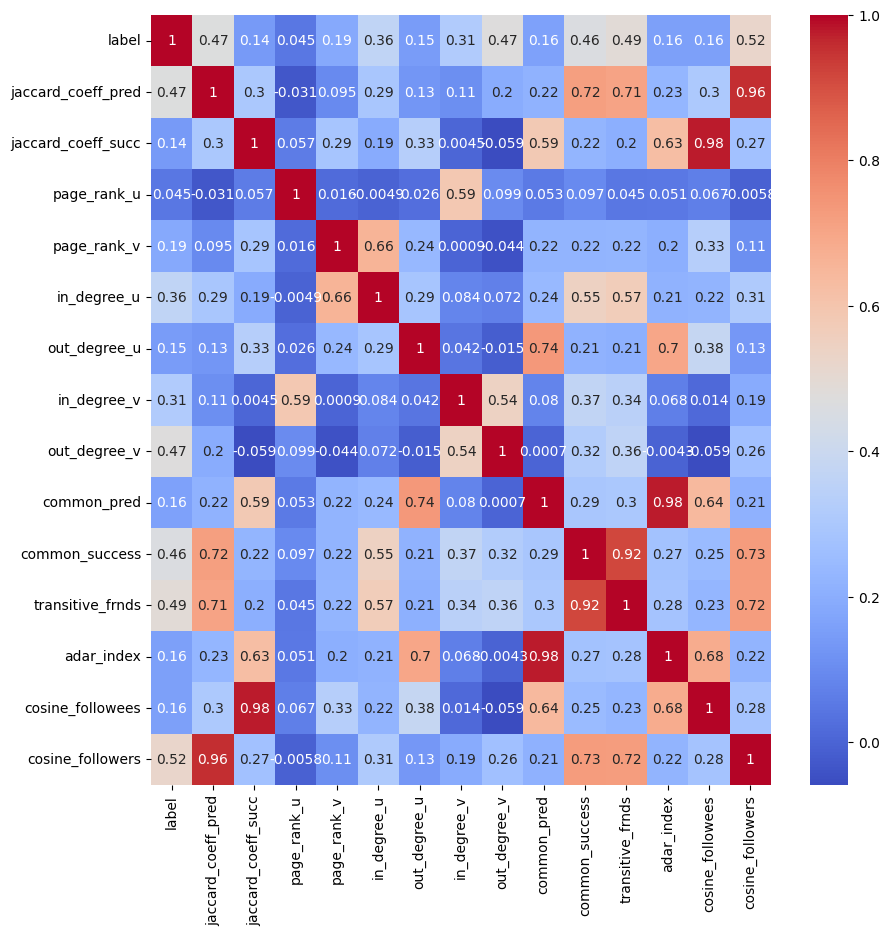

In [305]:
# Find the correlation between the features using heat map
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')

In [ ]:
# Estimate the features with high correlation
df_corr = df_train_new[['label','jaccard_coeff_pred', 'jaccard_coeff_success','page_rank_source','page_rank_target','in_degrees_u','out_degrees_u','in_degrees_v','out_degrees_v','follows_back', 'path_length']].corr()
df_corr = df_corr.abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: "Correlation Coefficient"}, inplace=True)
df_corr = df_corr[df_corr['Feature 1'] != df_corr['Feature 2']]
df_corr.drop_duplicates(subset=['Correlation Coefficient'], inplace=True)
# drop the rows with features with label in df_corr
df_corr = df_corr[((df_corr['Feature 1'] != "label") & (df_corr['Feature 2'] != "label"))]
# df_corr[((df_corr['Feature 1'] != "label") | (df_corr['Feature 2'] != "label")) & (df_corr['Correlation Coefficient'] > 0.2)]
df_corr[(df_corr['Correlation Coefficient'] > 0.2)]
# df_corr.shape

In [ ]:
# Find features with low correlation with label
df_corr = df_train_new[['label','jaccard_coeff_pred', 'jaccard_coeff_success','page_rank_source','page_rank_target','in_degrees_v','out_degrees_u','follows_back', 'path_length']].corr()
df_corr = df_corr.abs().unstack().sort_values(kind="quicksort", ascending=True).reset_index()
df_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: "Correlation Coefficient"}, inplace=True)
df_corr = df_corr[df_corr['Feature 1'] != df_corr['Feature 2']]
df_corr.drop_duplicates(subset=['Correlation Coefficient'], inplace=True)
df_corr = df_corr[((df_corr['Feature 1'] == "label") | (df_corr['Feature 2'] == "label"))]
df_corr[(df_corr['Correlation Coefficient'] <0.3)]

In [485]:
# Drop the features with high correlation
# use_features = features.copy()
use_features = ['label','jaccard_coeff_pred','jaccard_coeff_succ','page_rank_u','page_rank_v','transitive_frnds','adar_index','cosine_followees', 'cosine_followers']
# use_features.remove('path_length')
# use_features.remove('in_degrees_u')
# use_features.remove('out_degrees_v')
# use_features.remove('out_degrees_u')
# use_features.remove('in_degrees_v')
# use_features.remove('common_pred')
# use_features.remove('common_success')
# use_features.remove('reverse_path_length')
print(use_features)

['label', 'jaccard_coeff_pred', 'jaccard_coeff_succ', 'page_rank_u', 'page_rank_v', 'transitive_frnds', 'adar_index', 'cosine_followees', 'cosine_followers']


In [395]:
df_train.columns

Index(['label', 'jaccard_coeff_pred', 'jaccard_coeff_succ', 'page_rank_u',
       'page_rank_v', 'in_degree_u', 'out_degree_u', 'in_degree_v',
       'out_degree_v', 'common_pred', 'common_success', 'transitive_frnds',
       'adar_index', 'cosine_followees', 'cosine_followers'],
      dtype='object')

In [ ]:
# df_train.loc[df_train['reverse_path_length']==-1,'reverse_path_length'] = 10
df_train['reverse_path_length'].value_counts()

In [486]:
from sklearn import preprocessing

In [487]:
# features = ['label','jaccard_coeff_pred', 'jaccard_coeff_success', 'page_rank_source', 'page_rank_target','in_degrees_v','out_degrees_u','follows_back', 'path_length']
# use_features = ['jaccard_coeff_pred', 'jaccard_coeff_success', 'page_rank_source', 'page_rank_target','in_degrees_v','out_degrees_u','follows_back', 'path_length']
from sklearn.preprocessing import PolynomialFeatures

X_train, X_val, y_train, y_val = test_train(df_train[use_features])
# poly = PolynomialFeatures(2)
# X_train = poly.fit_transform(X_train)
# X_val = poly.transform(X_val)
scaler = preprocessing.RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_val)

In [ ]:
# increase variables in the model to get better accuracy by using interaction terms



# Logistic regression

In [423]:
df_train['label'].value_counts()

0    499890
1    442355
Name: label, dtype: int64

In [234]:
y_val.shape

(224716,)

In [488]:
# Logistic Regression
model_lr = LogisticRegression()
y_prob = predict_accuracy(model_lr, X_train, y_train, X_val, y_val)

F1-score: 0.8207055550792154
Accuracy: 0.8402119187305253
Confusion Matrix:
 [[111775  13198]
 [ 24442  86147]]
AUC: 0.8939775093093872


In [236]:
y_prob.shape

(224716,)

AUC: 0.8939775093093872


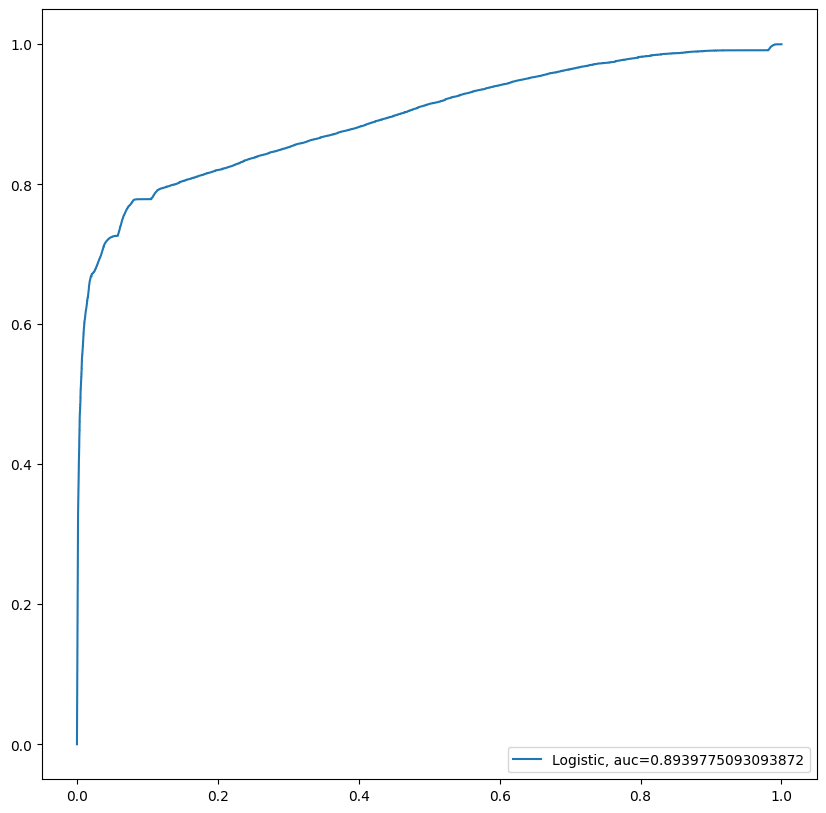

In [489]:
# draw the ROC curve and heatmap of confusion matrix
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_val,  y_prob) # use only the positive class probabilities
a = auc(fpr,tpr)
print("AUC:",a)
plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,label="Logistic, auc="+str(a))
plt.legend(loc=4)
plt.show()


<Axes: >

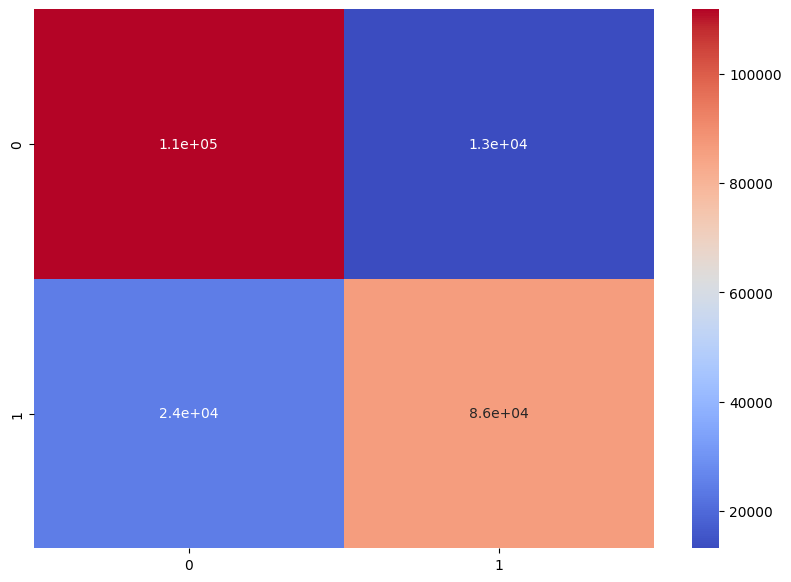

In [490]:
# PLOT CONFUSION MATRIX
y_hat = model_lr.predict(X_val)
cm = confusion_matrix(y_val, y_hat)
df_cm = pd.DataFrame(cm, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, cmap='coolwarm')


# Create KNN model

In [239]:
# Create weighted KNN model and predict the class label for test data
model_KNN = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='manhattan')
y_prob = predict_accuracy(model_KNN, X_train, y_train, X_val, y_val)

F1-score: 0.8631745507738017
Accuracy: 0.8930249737446376
Confusion Matrix:
 [[124851    149]
 [ 23890  75826]]
AUC: 0.8714320099883669


# Random Forests classifier

In [130]:
# train random forest classifier on train data and return the probability of class 1
rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=18)
y_prob = predict_accuracy(rf, X_train, y_train, X_val, y_val)

F1-score: 0.8020466144052192
Accuracy: 0.8325992169425165
Confusion Matrix:
 [[44365  5624]
 [ 9426 30489]]
AUC: 0.8494372454787353


# Neural Network

Epoch 1/100
5/5 [==============================] - 4s 679ms/step - loss: 1.8507 - accuracy: 0.6010 - val_loss: 1.6046 - val_accuracy: 0.8365
Epoch 2/100
5/5 [==============================] - 3s 633ms/step - loss: 1.6457 - accuracy: 0.7173 - val_loss: 1.5472 - val_accuracy: 0.8380
Epoch 3/100
5/5 [==============================] - 3s 636ms/step - loss: 1.5233 - accuracy: 0.7691 - val_loss: 1.4886 - val_accuracy: 0.8376
Epoch 4/100
5/5 [==============================] - 3s 632ms/step - loss: 1.4296 - accuracy: 0.7954 - val_loss: 1.4302 - val_accuracy: 0.8362
Epoch 5/100
5/5 [==============================] - 3s 623ms/step - loss: 1.3483 - accuracy: 0.8098 - val_loss: 1.3713 - val_accuracy: 0.8361
Epoch 6/100
5/5 [==============================] - 3s 601ms/step - loss: 1.2732 - accuracy: 0.8196 - val_loss: 1.3126 - val_accuracy: 0.8366
Epoch 7/100
5/5 [==============================] - 3s 612ms/step - loss: 1.2052 - accuracy: 0.8252 - val_loss: 1.2557 - val_accuracy: 0.8373
Epoch 8/100
5

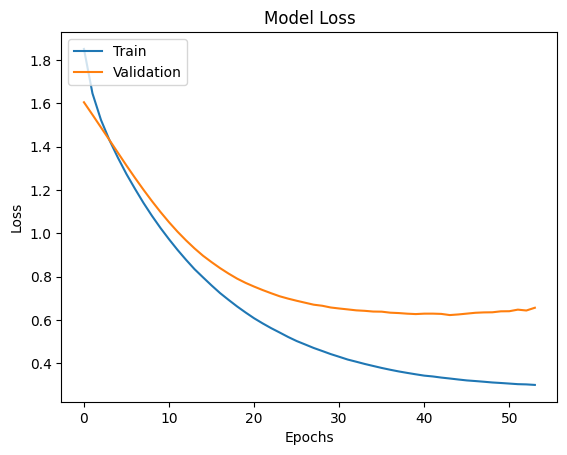

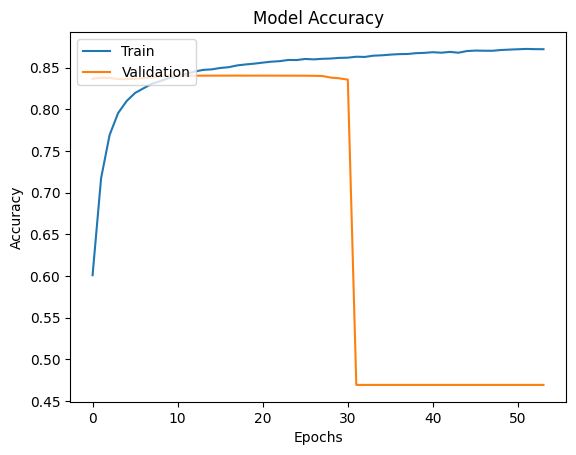

In [517]:
# Train a neural network model on train data and return the probability of class 1 with final layer as sigmoid and loss function as binary_crossentropy and optimizer as adam give prediction for test data use accuracy as metric
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
from keras import losses
from keras import metrics
from keras import regularizers
from keras import initializers
from keras import callbacks
from keras import backend as K
from keras import utils
from keras import models
from keras import layers
from keras import preprocessing


# add regularizer and dropout to avoid overfitting and underfitting of data and use relu as activation function for hidden layers and sigmoid for final layer
# add batch normalization to avoid vanishing gradient problem and use adam as optimizer and binary_crossentropy as loss function and accuracy as metric
# use early stopping to avoid overfitting of data
# show training and validation loss and accuracy using matplotlib

model = Sequential()
model.add(Dense(100, input_dim=8, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
# model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
# model.add(layers.BatchNormalization())
# model.add(layers.Dropout(0.5)) 
# model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
# model.add(layers.BatchNormalization())
# model.add(layers.Dropout(0.5)) 
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
history = model.fit(X_train, y_train, epochs=100, batch_size=150000, validation_data=(X_val, y_val), callbacks=[early_stopping])

# plot the training and validation loss and accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

7362/7362 [==============================] - 5s 674us/step
AUC: 0.8735762931629356


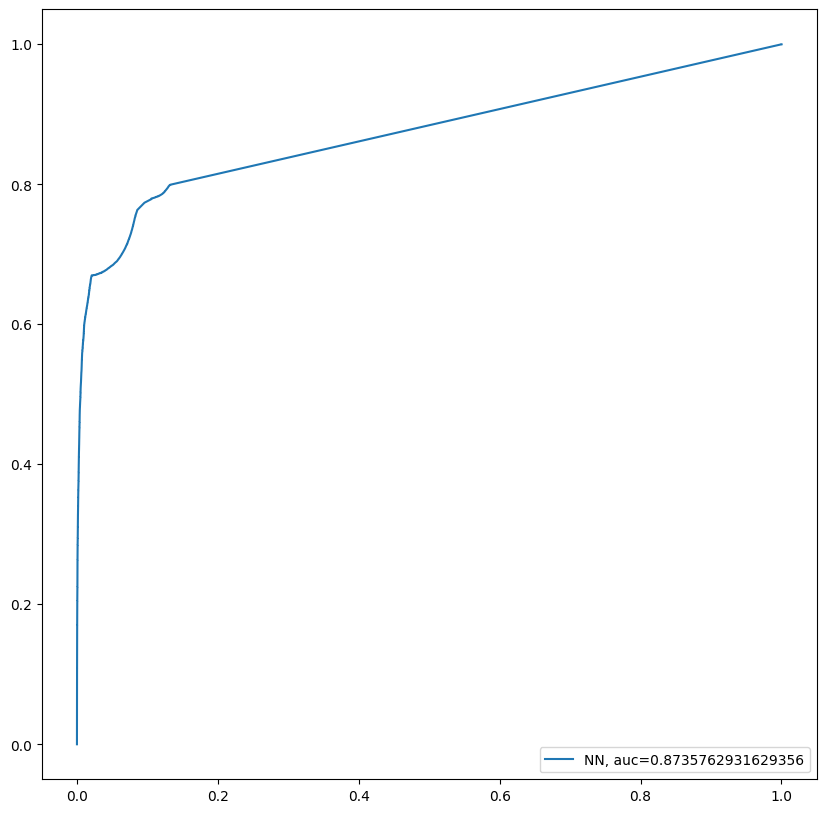

In [504]:
# draw validation auc curve and confusion matrix
y_hat = model.predict(X_val)
fpr, tpr, _ = roc_curve(y_val,  y_hat)
a = auc(fpr,tpr)
print("AUC:",a)
plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,label="NN, auc="+str(a))
plt.legend(loc=4)
plt.show()

   1/7362 [..............................] - ETA: 2:12

7362/7362 [==============================] - 5s 680us/step


<Axes: >

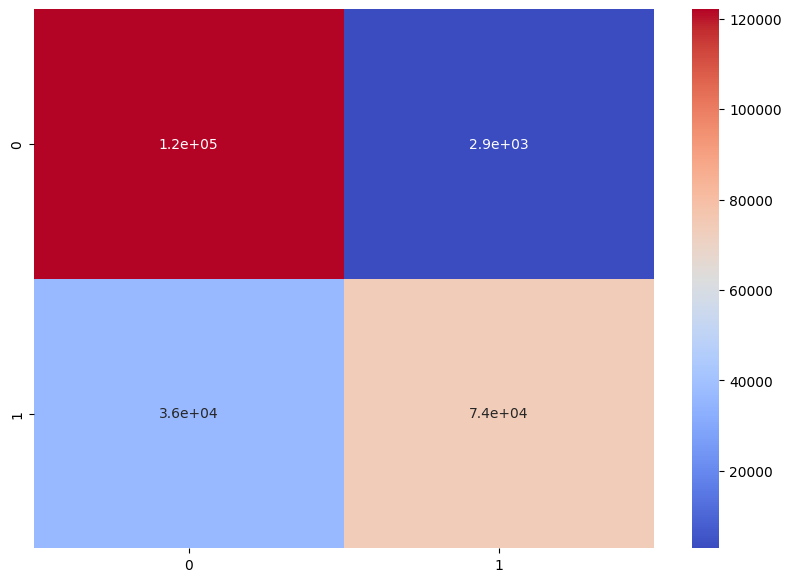

In [505]:
# confusion matrix
y_hat = model.predict(X_val)
y_hat = (y_hat > 0.5)
cm = confusion_matrix(y_val, y_hat)
df_cm = pd.DataFrame(cm, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, cmap='coolwarm')

# Load test

In [491]:
df_test = pd.read_csv('../data/test.csv', header= 0)
df_test.head()

,Id,From,To
0,1,3360982,4457271
1,2,4761876,4698439
2,3,4198430,3615486
3,4,2945770,747948
4,5,3950088,3360335


# Fetaure Extraction for test data

In [449]:
import numpy as np

def adar_index(g, a, b):
    succ_u = set(g.successors(a))
    succ_v = set(g.successors(b))
    if succ_u and succ_v:
        common = succ_u.intersection(succ_v)
        adar = 0
        for j in common:
            adar += 1/np.log(len(list(g.predecessors(j))))
        return adar
    else:
        return 0

In [450]:
def cosine_followees(g, a, b):
    succ_u = set(g.successors(a))
    succ_v = set(g.successors(b))
    if succ_u and succ_v:
        common = succ_u.intersection(succ_v)
        cosine = len(common)/((len(succ_u)*len(succ_v))**0.5)
        return cosine
    else:
        return 0
    
def cosine_followers(g, a, b):
    pred_u = set(g.predecessors(a))
    pred_v = set(g.predecessors(b))
    if pred_u and pred_v:
        common = pred_u.intersection(pred_v)
        cosine = len(common)/((len(pred_u)*len(pred_v))**0.5)
        return cosine
    else:
        return 0

In [492]:
# Feature extractions for test data based on From and To columns
# ['label','jaccard_coeff_pred', 'jaccard_coeff_success', 'page_rank_source', 'page_rank_target','in_degrees_v','out_degrees_u','follows_back', 'path_length']
df_test['jaccard_coeff_pred'] = df_test.apply(lambda row: jaccard_coeff_predecessors(g,row['From'],row['To']), axis=1)
df_test['jaccard_coeff_succ'] = df_test.apply(lambda row: jaccard_coeff_successors(g,row['From'],row['To']), axis=1)
df_test['page_rank_u'] = df_test.apply(lambda row: pr[row['From']], axis=1)
df_test['page_rank_v'] = df_test.apply(lambda row: pr[row['To']], axis=1)
# # df_test['follows_back'] = df_test.apply(lambda row: follows_back(row['From'],row['To'],g), axis=1)
# df_test['in_degree_u'] = df_test.apply(lambda row: out_degrees[row['From']], axis=1)
# df_test['in_degree_v'] = df_test.apply(lambda row: in_degrees[row['To']], axis=1)
# df_test['out_degree_u'] = df_test.apply(lambda row: in_degrees[row['From']], axis=1)
# df_test['out_degree_v'] = df_test.apply(lambda row: out_degrees[row['To']], axis=1)
# df_test['path_length'] = df_test.apply(lambda row: path_length(g,row['From'],row['To']), axis=1)
# df_test['common_pred'] = df_test.apply(lambda row: len(set(g.successors(row['From'])).intersection(set(g.successors(row['To'])))), axis=1)
# df_test['common_success'] = df_test.apply(lambda row: len(set(g.predecessors(row['From'])).intersection(set(g.predecessors(row['To'])))), axis=1)
# df_test['reverse_path_length'] = df_test.apply(lambda row: reverse_path_length(g,row['From'],row['To']), axis=1)
# df_test['out_degrees_v'] = df_test.apply(lambda row: out_degrees[row['To']], axis=1)
# df_test['in_degrees_u'] = df_test.apply(lambda row: out_degrees[row['From']], axis=1)
# df_test['jaccard_coeff_pred'] = df_test.apply(lambda row: jaccard_coeff_predecessors(g,row['From'],row['To']), axis=1)
# df_test['jaccard_coeff_succ'] = df_test.apply(lambda row: jaccard_coeff_successors(g,row['From'],row['To']), axis=1)
df_test['transitive_frnds'] = df_test.apply(lambda row: len(set(g.successors(row['From'])).intersection(set(g.predecessors(row['To'])))), axis=1)
# df_test['reverse_path_length'] = df_test.apply(lambda row: reverse_path_length(g,row['To'],row['From']), axis=1)
df_test['adar_index'] = df_test.apply(lambda row: adar_index(g,row['From'],row['To']), axis=1)
df_test['cosine_followees'] = df_test.apply(lambda row: cosine_followees(g,row['From'],row['To']), axis=1)
df_test['cosine_followers'] = df_test.apply(lambda row: cosine_followers(g,row['From'],row['To']), axis=1)


In [ ]:
df_test.loc[df_test['reverse_path_length']==-1,'reverse_path_length'] = 10

In [370]:
# df_test = df_test[use_features[1:]]

In [319]:
df_test.shape

(2000, 11)

In [493]:
df_test1 = df_test.drop(['Id','From','To'], axis=1)
df_test1 = df_test1[use_features[1:]]

In [494]:
#extract polynomial features from test data
# poly = PolynomialFeatures(2)
# df_test1 = poly.fit_transform(df_test1)
df_test1 = scaler.transform(df_test1)

In [495]:
# x_test_norm=scaler.transform(df_test1)
x_test_norm = df_test1

# Test predictions using Logistic Regression model

In [496]:
y_prob = model_lr.predict_proba(x_test_norm)
# return the probability of class 1
y_prob1 = [i[1] for i in y_prob]
#return the no of y_prob1 less than 0.5
sum([1 for i in y_prob1 if i<0.5])

780

0.12596465824718733

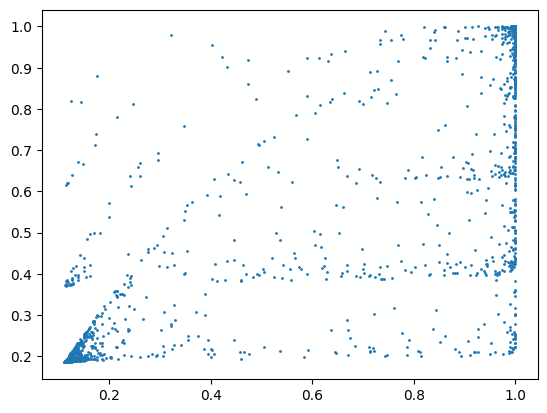

In [497]:
# Read the actual.csv and compare it with y_prob_1 using scatter plot
df_actual = pd.read_csv('../data/actual.csv', header= 0)
plt.scatter(df_actual['Predictions'], y_prob1, s=1)
# Mean absolute error between actual and predicted values
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df_actual['Predictions'], y_prob1)

In [236]:
# create a dataframe with Id and Probability as Predictions
df_pred = pd.DataFrame({'Id':df_test['Id'], 'Predictions':y_prob1})
df_pred.to_csv('../data/predictions_lr.csv', index=False)

# Test Prediction using KNN model

In [99]:
y_pred_proba = model_KNN.predict_proba(x_test_norm)[::,1]
y_pred = model_KNN.predict(x_test_norm)
y_pred_proba

array([1.        , 0.513126  , 0.42693989, ..., 0.82536563, 0.        ,
       0.        ])

0.13790880704248998

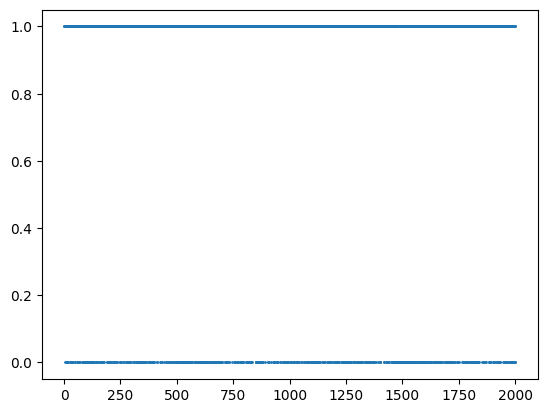

In [100]:
# Read the actual.csv and compare it with y_prob_1 using scatter plot
df_actual = pd.read_csv('../data/actual.csv', header= 0)
plt.scatter(df_actual['Id'],y_pred, s=1)
# Mean absolute error between actual and predicted values
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df_actual['Predictions'], y_pred_proba)

In [310]:
# create a dataframe with Id and Probability as Predictions
df_pred = pd.DataFrame({'Id':df_test['Id'], 'Predictions':y_pred_proba})
df_pred.to_csv('../data/predictions.csv', index=False)

# Test Prediction using Random Forest model

In [75]:
# calculate prediction for test data using random forest classifier
y_prob_rf_test = rf.predict_proba(x_test_norm)
y_prob1_rf_test = [i[1] for i in y_prob_rf_test]
# y_prob1_rf_test

NameError: name 'rf' is not defined

In [74]:
sum([1 for i in y_prob1_rf_test if i<0.5])

NameError: name 'y_prob1_rf_test' is not defined

0.12598650082083981

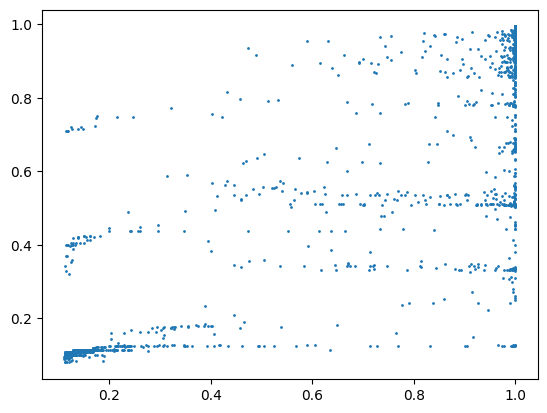

In [103]:
# Read the actual.csv and compare it with y_prob_1 using scatter plot
df_actual = pd.read_csv('../data/actual.csv', header= 0)
plt.scatter(df_actual['Predictions'], y_prob1_rf_test, s=1)
# Mean absolute error between actual and predicted values
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df_actual['Predictions'], y_prob1_rf_test)

# Test prediction using Neural network 

63/63 [==============================] - 0s 767us/step


0.24005318829972305

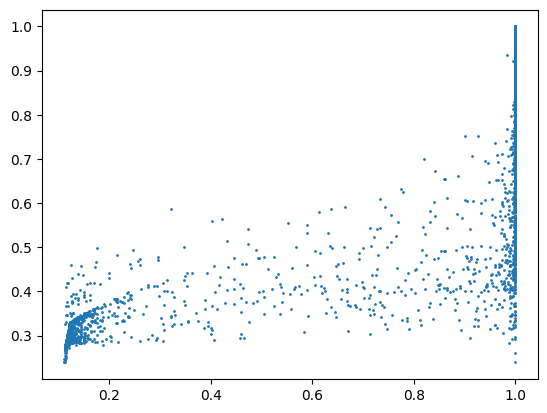

In [506]:

# calculate prediction for test data using neural network classifier
y_prob_nn_test = model.predict(x_test_norm)
y_prob1_nn_test = [i[0] for i in y_prob_nn_test]
# y_prob1_nn_test

# compare the actual and predicted values using scatter plot
plt.scatter(df_actual['Predictions'], y_prob1_nn_test, s=1)
# Mean absolute error between actual and predicted values
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df_actual['Predictions'], y_prob1_nn_test)

In [516]:
# sum of y_prob1_nn_test less than 0.5
sum([1 for i in y_prob1_nn_test if i<0.4])

672

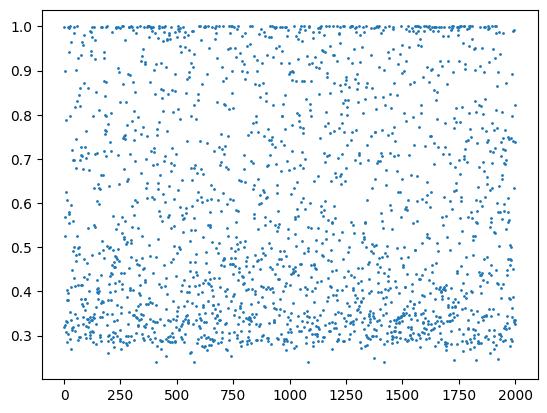

In [508]:
# plot the y_prob1_nn_test wrt Id
plt.scatter(df_actual['Id'], y_prob1_nn_test, s=1)


In [165]:
df_pred = pd.DataFrame({'Id':df_test['Id'], 'Predictions':y_prob1_nn_test})
df_pred.to_csv('../data/predictions_NN.csv', index=False)


# Saving the prediction file

In [381]:
# create a dataframe with Id and Probability as Predictions
df_pred = pd.DataFrame({'Id':df_test['Id'], 'Predictions':y_prob1_rf_test})
df_pred.to_csv('../data/predictions.csv', index=False)


# After midnight

In [ ]:
# sum if df_actual['Predictions'] > 0.5
sum([1 for i in df_actual['Predictions'] if i<0.5])

In [ ]:
# train a naive bayes model on train data and return the probability of class 1
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_prob_gnb = predict_accuracy(gnb, X_train, y_train, X_val, y_val)


In [ ]:
# calculate prediction for test data using naive bayes classifier
y_prob_gnb_test = gnb.predict_proba(x_test_norm)
y_prob1_gnb_test = [i[1] for i in y_prob_gnb_test]
y_prob1_gnb_test

In [ ]:
# compare the actual and predicted values using scatter plot
plt.scatter(df_actual['Predictions'], y_prob1_gnb_test, s=1)
# Mean absolute error between actual and predicted values
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df_actual['Predictions'], y_prob1_gnb_test)


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                        solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
y_prob_mlp = predict_accuracy(mlp, X_train, y_train, X_val, y_val)

In [ ]:
# install keras
%pip install keras

In [ ]:
%pip install tensorflow

In [ ]:
y_prob_nn_test = model.predict(x_test_norm)
y_prob1_nn_test = [i[0] for i in y_prob_nn_test]
y_prob1_nn_test

# compare the actual and predicted values using scatter plot
plt.scatter(df_actual['Predictions'], y_prob1_nn_test, s=1)
# Mean absolute error between actual and predicted values
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df_actual['Predictions'], y_prob1_nn_test)


In [ ]:
sum([1 for i in y_prob1_nn_test if i<0.5])

In [ ]:
# calculate confusion matrix for neural network classifier
y_pred_nn = model.predict(X_val).argmax(axis=1)

In [ ]:
# add different colors for different models
plt.scatter(df_actual['Id'], y_prob1_nn_test, s=1, c='r')
plt.scatter(df_actual['Id'], df_actual["Predictions"], s=1, c='b')

In [ ]:
df_pred = pd.DataFrame({'Id':df_test['Id'], 'Predictions':y_prob1_nn_test})
df_pred.to_csv('../data/predictions_nn.csv', index=False)

In [ ]:
# calculate prediction for test data using GNN classifier
y_prob_mlp_test = mlp.predict_proba(x_test_norm)

In [ ]:
# return the probability of class 1
y_prob1_mlp_test = [i[1] for i in y_prob_mlp_test]
y_prob1_mlp_test

In [ ]:
# compare the actual and predicted values using scatter plot
plt.scatter(df_actual['Predictions'], y_prob1_mlp_test, s=1)
# Mean absolute error between actual and predicted values
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df_actual['Predictions'], y_prob1_mlp_test)

In [ ]:
# create confusion matrix for mlp classifier
y_pred_mlp = mlp.predict(X_val)
confusion_matrix(y_val, y_pred_mlp)


In [ ]:
df_pred = pd.DataFrame({'Id':df_test['Id'], 'Predictions':y_prob1_mlp_test})
df_pred.to_csv('../data/predictions_mlp.csv', index=False)

In [ ]:
# calculate the number of data points with probability less than 0.5 in df actual
sum([1 for i in df_actual['Predictions'] if i<0.5])

In [ ]:
sub = pd.read_csv('../data/submission_today.csv', header= 0)
# plot the distribution of the predictions
plt.hist(y_prob1_nn_test, bins=100)
plt.hist(df_actual['Predictions'], bins=100)
plt.xlim(0,1)


In [ ]:
# caluculate number of data points with probability less than 0.5
sum([1 for i in y_prob1_nn_test if i<0.5])


In [ ]:
sum([1 for i in df_actual['Predictions'] if i<0.5])

In [ ]:
# Train SVM model on train data and return the probability of class 1
from sklearn import svm
clf = svm.SVC(kernel='linear', probability=True)
y_prob_svm = predict_accuracy(clf, X_train, y_train, X_val, y_val)

# calculate prediction for test data using SVM classifier
y_prob_svm_test = clf.predict_proba(x_test_norm)
y_prob1_svm_test = [i[1] for i in y_prob_svm_test]
y_prob1_svm_test

# compare the actual and predicted values using scatter plot
plt.scatter(df_actual['Predictions'], y_prob1_svm_test, s=1)
# Mean absolute error between actual and predicted values
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df_actual['Predictions'], y_prob1_svm_test)


In [ ]:
# construct graph from train_pos and train_ve 
g = nx.DiGraph()
g.add_edges_from(train_pos.keys())
g.add_edges_from(train_ve.keys())


In [ ]:
df_nn = pd.read_csv('../data/predictions_nn.csv', header= 0)
# Read the actual.csv and compare it with y_prob_1 using scatter plot
df_actual = pd.read_csv('../data/actual.csv', header= 0)


In [ ]:
# number of data points with probability less than 0.5
sum([1 for i in df_nn['Predictions'] if i<0.5])

In [ ]:
# mae
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df_actual['Predictions'], df_nn['Predictions'])


In [ ]:
for i in df_actual['Predictions']:
    if i<0.5:
        print(i)

In [ ]:
# create 2 lists for actual and predicted values with 1 and 0
actual = []
pred = []
for i in df_actual['Predictions']:
    if i<0.5:
        actual.append(0)
    else:
        actual.append(1)
for i in df_nn['Predictions']:
    if i<0.5:
        pred.append(0)
    else:
        pred.append(1)

In [ ]:
# # plot graph for actual and predicted values
# # plt.scatter(df_actual['Id'], actual, s=1, c='r')
# plt.scatter(actual, pred, s=1, c='b')


In [ ]:
count = 0
li = []
for i in range(len(actual)):
    if actual[i] !=  pred[i]:
        # count += 1
        li.append(i)
        print(actual[i], pred[i], i)
# print(count)

In [ ]:
li[0]

In [ ]:
df_actual['Predictions'][li[0]]

In [ ]:
li

In [ ]:
for i in li:
    print(df_actual['Predictions'][i], df_nn['Predictions'][i])

In [ ]:
# count number where actual is 1 and predicted is 0 in li
sum([1 for i in li if df_actual['Predictions'][i] > df_nn['Predictions'][i]])


In [ ]:
# df_test = pd.read_csv('../data/test.csv', header= 0)
df_test.loc[li, :]['page_rank_source'].value_counts()
# df_test.columns

In [ ]:
df_test['page_rank_target'].max()

In [ ]:
# Plot histogram of out_degrees_u for test data with 10 bins
# plt.hist(df_test['out_degrees_u'], bins=10)
df_test['out_degrees_u'].max()

In [ ]:
df_train_pos['out_degrees_u'].max()

In [ ]:
df_test.shape